# Simple Linear Regression
This Notebook is divided into three parts:

 1. Building Linear Regression Model using sklearn

 2. Building the model like a Pro using sklearn!!
 3. Model Building using statsmodels

In [183]:
import warnings
warnings.filterwarnings('ignore')

# Building Linear Regression Model using sklearn
Below mentioned are the steps to be followed:

 1. Load the data
 2. Data Preparation - train-test Split, Normalisation or Rescaling
 3. Training the Model
 4. Prediction
 5. Evaluation

# Load the data

In [184]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [185]:
df=pd.read_csv('/content/student_scores.csv')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [186]:
df.shape

(25, 2)

# 2. Data Preparation

In [187]:
target=df['Scores']
data=df[['Hours']]

In [188]:
data

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5
5,1.5
6,9.2
7,5.5
8,8.3
9,2.7


In [189]:
target

0     21
1     47
2     27
3     75
4     30
5     20
6     88
7     60
8     81
9     25
10    85
11    62
12    41
13    42
14    17
15    95
16    30
17    24
18    67
19    69
20    30
21    54
22    35
23    76
24    86
Name: Scores, dtype: int64

In [190]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data,target,test_size=0.7,random_state=0)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(7, 1) (7,)
(18, 1) (18,)


In [191]:
X_train.head()

,Hours
7,5.5
20,2.7
3,8.5
0,2.5
21,4.8


In [192]:
X_test.head()

,Hours
5,1.5
2,3.2
19,7.4
16,2.5
11,5.9


# 3. Training the model

In [193]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [194]:
print("y intercept:",regression.intercept_)
print("Slope:",regression.coef_)

y intercept: 1.0979263522987353
Slope: [9.8479817]


# 4. Prediction

In [195]:
y_test_pred=regression.predict(X_test)

In [196]:
tem_df=pd.DataFrame({'Actual':y_test,"Predict":y_test_pred})
tem_df.head()

,Actual,Predict
5,20,15.869899
2,27,32.611468
19,69,73.972991
16,30,25.717881
11,62,59.201018


<Axes: xlabel='Scores', ylabel='Count'>

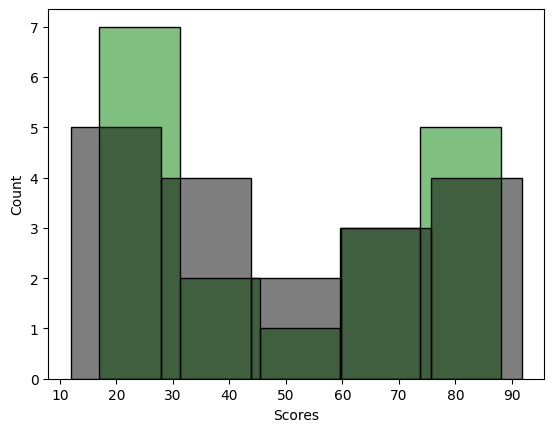

In [197]:
sns.histplot(y_test,color='green',alpha=0.5,bins=5)
sns.histplot(y_test_pred,color='black',alpha=0.5,bins=5)

# 5. Evaluation

In [198]:
from sklearn import metrics

# print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

# print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Root Mean Squared Error:  5.336173756108547


# Building the model like a Pro using sklearn!!
Below mentioned are the steps to be followed:

 1. Load the data
 2. Understand and Viz the data
 3. Data Preparation - train-test Split, Normalisation or Rescaling
 4. Training the Model
 5. Residual Analysis on Training Data
 6. Prediction
 7. Evaluation

# Load the data

In [199]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [200]:
df=pd.read_csv("/content/student_scores.csv")

In [201]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# 2. Understanding and Visuallizing the dat

In [202]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [203]:
df.shape

(25, 2)

In [204]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


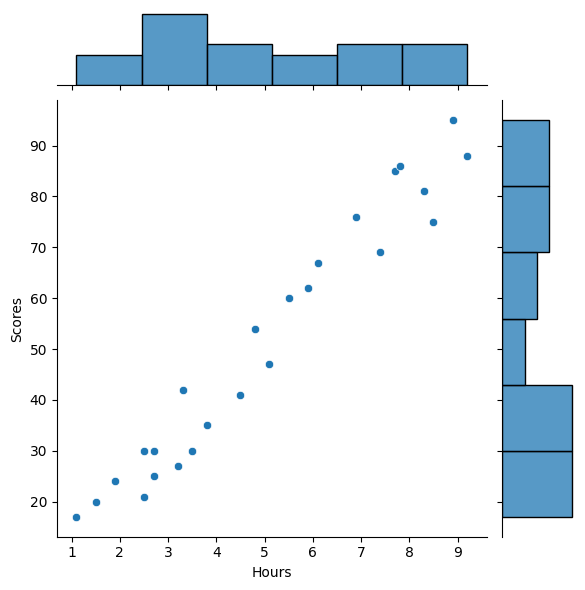

In [205]:
sns.jointplot(x='Hours',y="Scores",data=df,kind='scatter')

In [206]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


<Axes: >

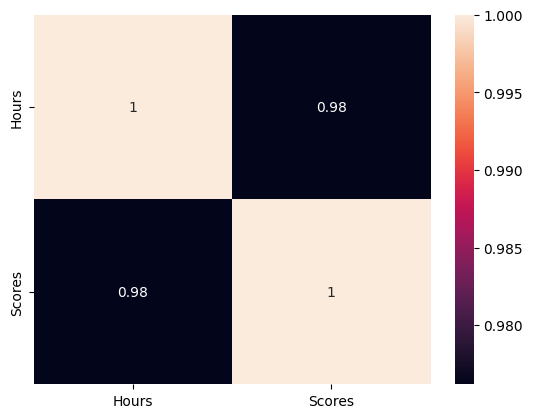

In [207]:
plt.figure()
sns.heatmap(df.corr(),annot=True)

# 3. Data Preparation
1. Splitting df into train and test
2. Rescaling the variables (Normalisation or Standardisation)

    . Interpretability improves
    
    . Model trains fast

In [208]:
X=df[["Hours"]]
y=df['Scores']

In [209]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)

print(X_train.shape)
print(X_test.shape)

(17, 1)
(8, 1)


In [210]:
X_train.head()

,Hours
23,6.9
14,1.1
1,5.1
10,7.7
13,3.3


In [211]:
X_test.head()

,Hours
5,1.5
2,3.2
19,7.4
16,2.5
11,5.9


# 4. Training

In [212]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [213]:
print('y intercept:',regressor.intercept_)

y intercept: 2.3708153823418883


In [214]:
print("Slope:",regressor.coef_)

Slope: [9.78856669]


# 5. Residual Analysis on Training Data
 1. Distribution of the Residuals - Distribution should be normal (Gaussian) with Zero Mean.
 2. IID - Check for patterns in Residuals - There should exist no pattern
 3.Homoscedasticity - The variance of residual is the same for any value of X

In [215]:
y_train_pred=regressor.predict(X_train)

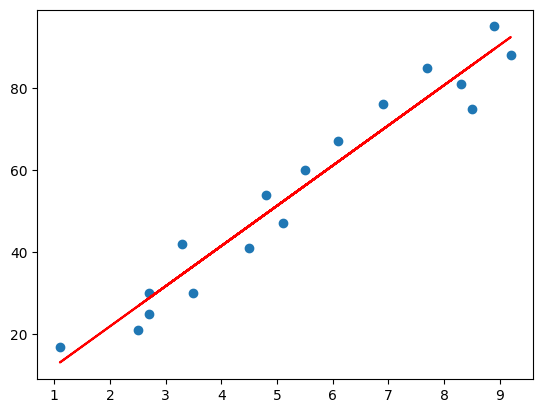

In [216]:
plt.scatter(X_train['Hours'],y_train)
plt.plot(X_train['Hours'],y_train_pred,'r')
plt.show()

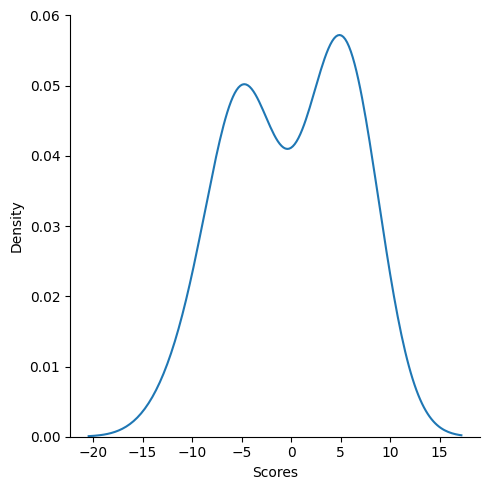

In [217]:
residual=y_train-y_train_pred
sns.displot(residual, kind='kde')

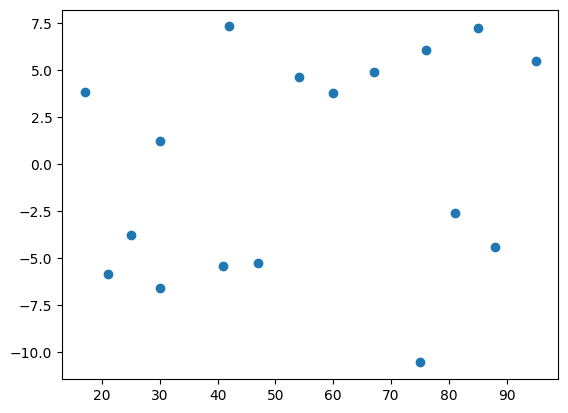

In [218]:
plt.scatter(y_train,residual)

# 6. Making the Prediction

In [219]:
y_test_pred=regressor.predict(X_test)

In [220]:
tem_df=pd.DataFrame({'Actual':y_test,"Predicted":y_test_pred})

In [221]:
tem_df

,Actual,Predicted
5,20,17.053665
2,27,33.694229
19,69,74.806209
16,30,26.842232
11,62,60.123359
22,35,39.567369
17,24,20.969092
24,86,78.721636


# 7. Evaluating the Algorithm

In [222]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_test_pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_test_pred)))

Mean Absolute Error: 4.419727808027651
Mean Squared Error: 22.965097212700428
Root Mean Squared Error: 4.7921912746363144


In [223]:
metrics.median_absolute_error(y_test,y_test_pred)

3.8625683463868796

In [224]:
print(metrics.r2_score(y_test,y_test_pred))

0.9568211104435257


In [225]:
r2=metrics.r2_score(y_test,y_test_pred)
n=len(y_test)
k=X_test.shape[1]

r2_adj=1-(1-r2)*(n-1)/(n-k-1)

print(r2_adj)

0.9496246288507799


# Model Building using statsmodels
Below mentioned are the generic steps for model building using statsmodels

 1. Load the data
 2. Understand and Viz the data
 3. Data Preparation - train-test Split, Normalisation or Rescaling
 4. Training the Model using statsmodels
 5. Residual Analysis on Training Data
 6. Prediction
 7. Evaluation

In [226]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [227]:
df=pd.read_csv('/content/student_scores.csv')

In [228]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [229]:
y=df.pop("Scores")
X=df


In [231]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.7,random_state=0)
print(X_train.shape)
print(X_test.shape)

(7, 1)
(18, 1)


# 4. Building the Model using statsmodels

In [233]:
import statsmodels.api as sm

In [234]:
# Add a constant to get an intercept
X_train_sm=sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
lr=sm.OLS(y_train,X_train_sm).fit()

In [235]:
lr.params

const    1.097926
Hours    9.847982
dtype: float64

In [236]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                 Scores   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     79.37
Date:                Thu, 28 Mar 2024   Prob (F-statistic):           0.000297
Time:                        11:22:42   Log-Likelihood:                -22.253
No. Observations:                   7   AIC:                             48.51
Df Residuals:                       5   BIC:                             48.40
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0979      6.453      0.170      0.8

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


# Understanding the above Statistical Summary about the model

We are interested in below mentioned values:

The coefficient and its p-value
R - Square value
p - value of F Statistics
1. The coefficient of Hours is 1.0165 and its p - value is 0.000

This means the coefficient is statistically significant.

2. R - Square value is 0.948

i.e. 94.8 % variance in Scores is explained by Hours

3. Observe that F - Statistics has a very low p - value

This means that the complete model is statistically significant.

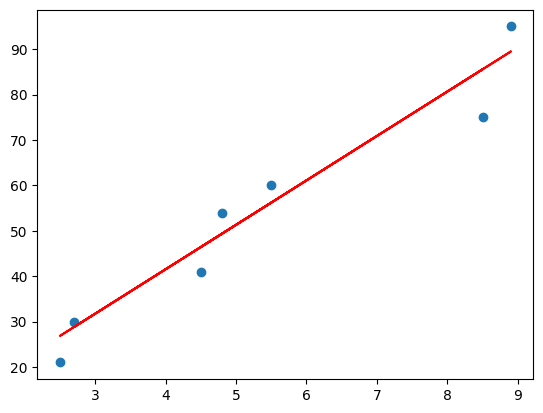

In [237]:
plt.scatter(X_train['Hours'],y_train)
plt.plot(X_train['Hours'], 2.370815 + 9.788567*X_train['Hours'],'r')
plt.show()